In [2]:
import torch
from importlib.metadata import version

print(version("tiktoken"))

# import上一级目录下的GPTV1
import sys
sys.path.append("..")
from GPTV1 import GPTModel


0.12.0


# loss function
## cross entropy loss 
二分类交叉熵损失函数的公式：
$$
L(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$
其中
$$
y \in \{0, 1\}
$$
是真实标签，
$$
\hat{y} \in (0, 1)
$$
是模型预测的概率。

## 基础认知
一般来讲，模型输出的内容“希望”是一个概率分布，也就是说经过了 Softmax 函数处理，输出的内容是一个概率分布，而目标是一个明确的分布，或者是一个明确的标签（one-hot）.
这时候只要计算两个分布的差异打底有多大
两个分布的差异如何评价？也就是说为什么要使用交叉熵损失函数，交叉熵的本质是什么，为什么要取 log 函数

### 极大似然估计 maximum likelihood estimation
当我们看到一个现象的时候，我们往往希望取推算发生这个想象的原因，原因可能由多个因素组成的，我们希望取到其中概率最大的组成，这就是极大似然估计。就是从结果反推原因的概率，因为这是一个推算，所以是一种估计。

比如有个黑盒，里面有黑白两种颜色的球，每次我们从里面取一个球，当我们重复取了 10 次，发现，8次是白球，2 次是黑球，我们可以推测，这个黑盒里面的球是黑白两种颜色的比例是 8:2. 当然这只是一个推测。

影响我们取出的球是黑的还是白的原因是本来合理里面到底有多少白球多少黑球。

假设黑球占比是 p，白球占比是 1-p.

那 取 10 次，产生的结果是 8 次白球 2 次黑球的概率是 
$$
P(8 \text{ white balls}, 2 \text{ black balls}) = p^8 (1-p)^2
$$





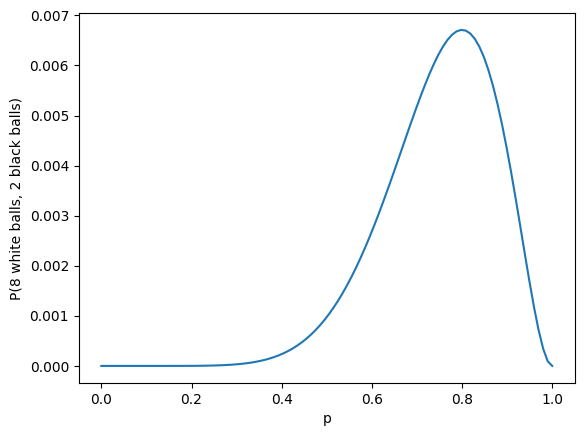

In [8]:
# 用plot画出P(8 \text{ white balls}, 2 \text{ black balls}) = p^8 (1-p)^2的概率分布
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0, 1, 100)
prob = p**8 * (1-p)**2

plt.plot(p, prob)
plt.xlabel("p")
plt.ylabel("P(8 white balls, 2 black balls)")
plt.show()

当 p 取不同的值的时候，P(8, 2) 取不同的值。当p=0.8时，P(8, 2)是最大值，也就是说p=0.8 的概率是最大的，或者说，当p 是 0.8时，发生取 10 次得到8个白球和2个黑球的概率是最大的。

如何求解p，使得P(8, 2) 是最大值？
似然函数公式：
$$
L(p) = p^8 (1-p)^2
$$  

先去对数，得到
$$
\log L(p) = 8 \log p + 2 \log (1-p)
$$
对 \log L(p) 求导，得到
$$
d\log L(p) / dp = 8 / p - 2 / (1-p)
$$
当 d\log L(p) / dp = 0 时，\log L(p) 是最大值
$$
8 / p - 2 / (1-p) = 0
$$
解得
$$
p = 0.8
$$

实际应用中，这个似然函数比较难以直接确定和求解，一方面每个相关因素的概率表达比较复杂，同时，这些概率要联合起来，才能得到最终的似然函数。这样的函数就是不能直接求解，需要通过梯度下降等方法来求解。

所以，一方面要确定概率的表达，或者说找一个函数，使得这个函数的似然函数是最大的。

这个可能是很多模型基础里面的最关键的一点，包括现在的分类模型，diffusion模型，以及大语言模型，基本的原理都要用这个似然函数来解释，并且基于似然函数函数才能指导确定采用什么样的损失函数。

https://www.bilibili.com/video/BV15V411W7VB/?spm_id_from=333.337.search-card.all.click&vd_source=59eeaa1ac32f4229bdcd8a162bc60779
这个视频介绍了一些比较核心的问题，

信息的本质，就是确定一件事情

可以把人、模型、一个组织、一个机器都按照输入，决定性要素，输出来看，信息就是能确定多少要素，如果输入是明确的，如果能完全掌握影响要素，那就能确定输出，掌握的难度在于某个因素的确定性的高低

信息就是对确定性的描述

交叉熵是对信息确定性的一种描述方法，或者说比较方法，所以是一种人为设计的计算方法

### KL散度




In [ ]:
# cross entropy loss
import torch.nn as nn
cross_entropy = nn.CrossEntropyLoss()



### 处理过程
* 先对输出做 softmax，每个维度上变成一个概率值
* 将概率值取对数，再取负,


In [ ]:
torch.nn.functional.cross_entropy()

In [11]:
version("torch")

'2.8.0'

In [ ]:
GPT_CONFIG_124M = {
"vocab size" : 100277,
"context length" : 1024,
"emb_dim" : 768,
"n_heads" : 12,
"n_layers" : 12,
"drop_rate" : 0.1,
"qkv_bias" : False
}

In [ ]:
import tiktoken

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True, num_workers=0):
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)

    return dataloader

# load text file the-verdict.txt
file_path = "./the-verdict.txt"
with open(file_path, "r") as f:
    data = f.read()

data[:100]
len(data)

enc = tiktoken.get_encoding("cl100k_base")
tokens = enc.encode(data)
len(tokens)

# conver to tensors
import torch
tokens = torch.tensor(tokens)







4943

## dataloader
dataloader的核心功能包括：
1. 批量加载数据
2. 数据 shuffle
3. 并行加载数据

dataloader 就是连续的多个 batch，每个 batch 里有 batch_size 个样本对，每个样本对包括一个输入和一个标签



## epochs and batchs
训练的两个维度，一个是 epoch，一个是 batch

一个 epoch 是指模型遍历一次整个数据集, 
一个 batch 是指epoch中的一批数据，每个 batch 中的数据量是固定的，有多少个 batch 就看有多少数据，

有多少个 epoch 要看训练的实际效果，一般来说，每个 epoch 训练完后，模型的性能会有提升，如果性能没有提升，说明模型已经训练到了最优状态，这时候就可以停止训练了。

训练过程中需要持续观察效果，主要是看损失函数的变化，损失函数越小，说明模型的性能越好，
如果损失函数没有变化，说明模型已经训练到了最优状态，这时候就可以停止训练了。

## 训练过程
1. 取一个 batch的训练数据进行训练，
1. 每个 batch 训练完后，根据结果计算 loss，
1. 反向传播，更新模型的参数，

训练过程中，观测在测试集上的效果

In [5]:
tensor = torch.randn(2, 3, 4  ) 
print(tensor)

a = tensor.view(-1, tensor.size(-1))
a

tensor([[[-1.0370,  0.0427, -0.8275,  1.5897],
         [-0.6331, -0.1440,  0.9304, -1.2861],
         [ 0.4175, -0.1716, -0.4028, -0.0544]],

        [[-1.5732, -0.1883,  0.1012,  0.1669],
         [ 1.5589, -1.3962, -1.4786, -2.5394],
         [ 0.4266,  0.7316,  0.4232, -0.4500]]])


tensor([[-1.0370,  0.0427, -0.8275,  1.5897],
        [-0.6331, -0.1440,  0.9304, -1.2861],
        [ 0.4175, -0.1716, -0.4028, -0.0544],
        [-1.5732, -0.1883,  0.1012,  0.1669],
        [ 1.5589, -1.3962, -1.4786, -2.5394],
        [ 0.4266,  0.7316,  0.4232, -0.4500]])